In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
df.keys()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
feature = df.drop(['price','date'],axis=1)
feature.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
target = df["price"]
target.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

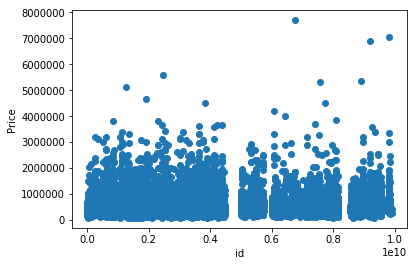

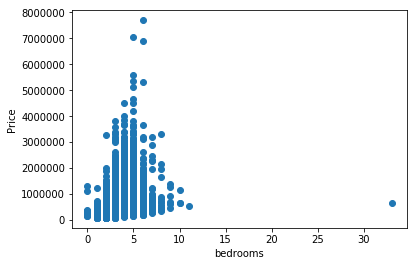

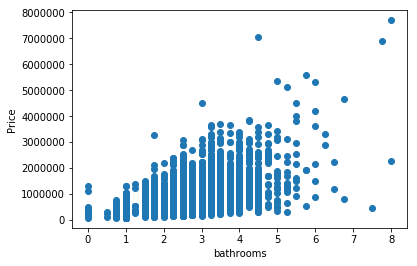

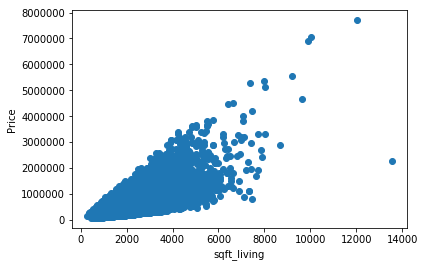

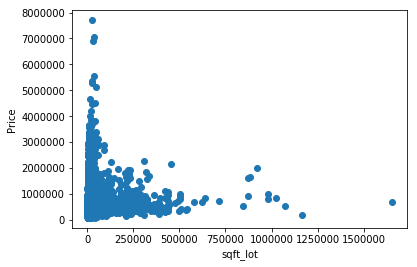

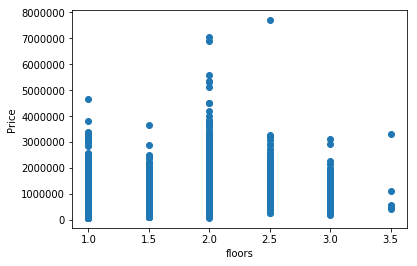

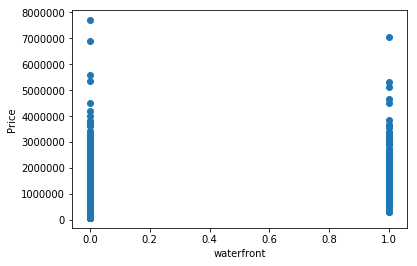

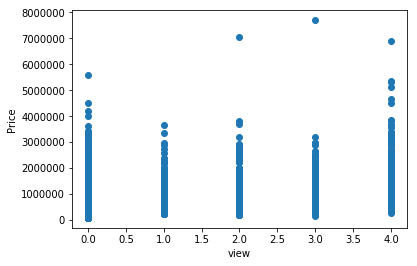

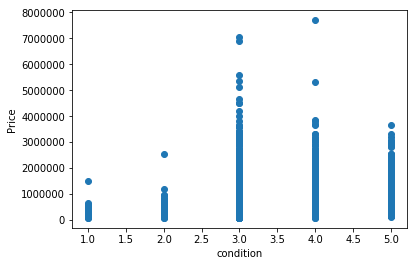

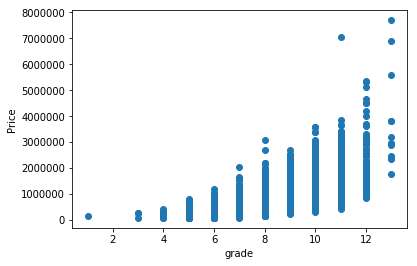

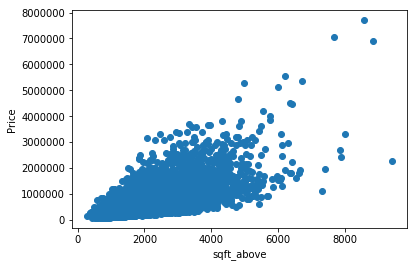

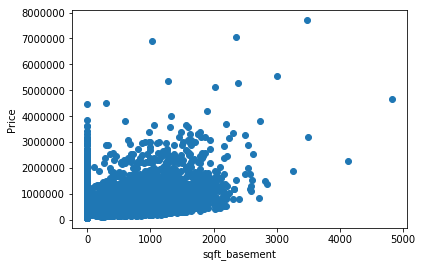

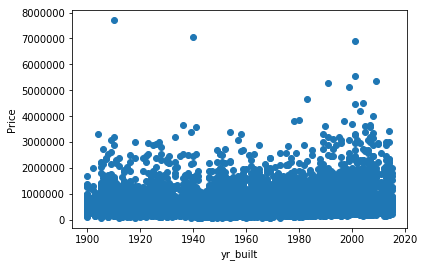

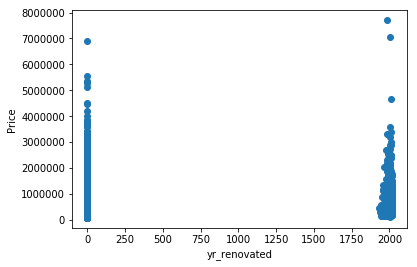

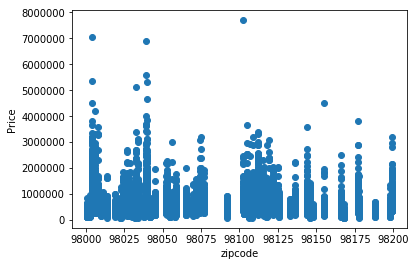

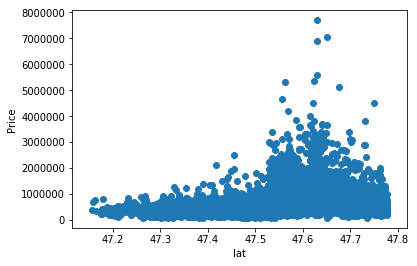

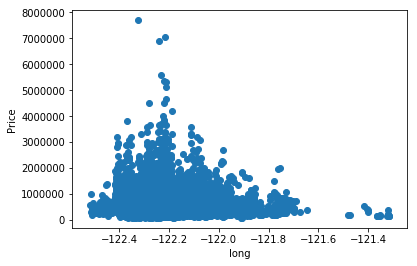

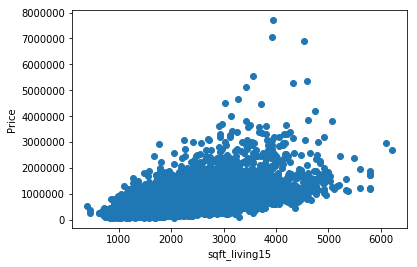

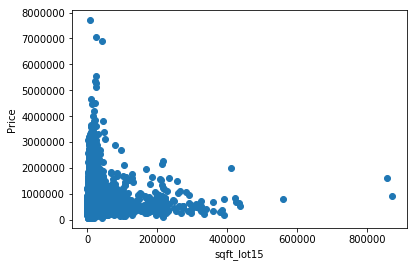

In [7]:
for col in feature.columns:    
    plt.scatter(feature[col],target)
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.show()

In [9]:
#Split the Data for training and testing
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.33, random_state=15)


# Dicision Tree

In [37]:
# from sklearn.tree import DecisionTreeRegressor
model_d_t = DecisionTreeRegressor()
model_d_t.fit(X_train,y_train)
pred_d_t = model_d_t.predict(X_test)
pred_d_t = pd.Series(pred_d_t)
print("r2_d_t -->",r2_score(y_test,pred_d_t))
print("mead_d_t -->",mean_squared_error(y_test,pred_d_t))

r2_d_t --> 0.7235618113523083
mead_d_t --> 38223109217.25936


In [38]:
print("Actual Value :\n",y_test.head())
print("Predicted Value by Dicision Tree :\n",pred_d_t.head())

Actual Value :
 17147    805000.0
18386    390000.0
20657    379900.0
21244    485000.0
19922    455000.0
Name: price, dtype: float64
Predicted Value by Dicision Tree :
 0    780000.0
1    330000.0
2    350000.0
3    483453.0
4    395000.0
dtype: float64


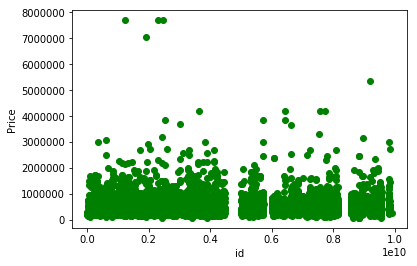

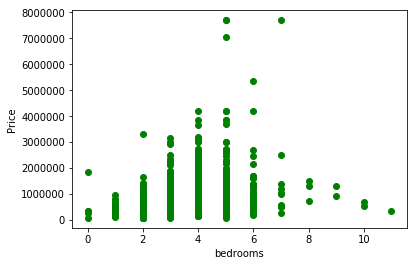

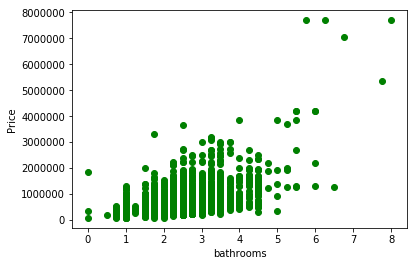

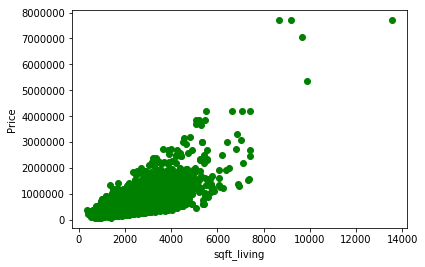

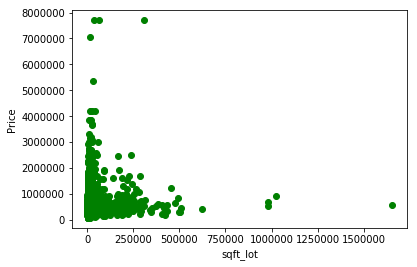

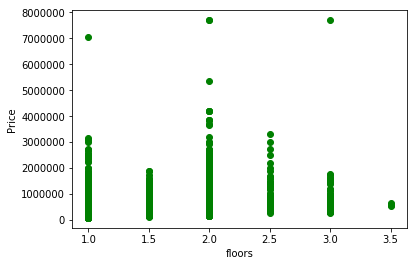

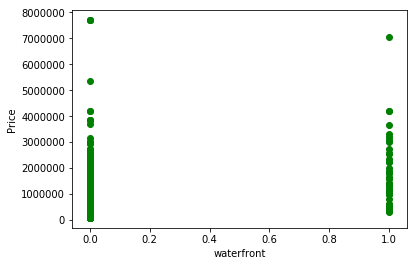

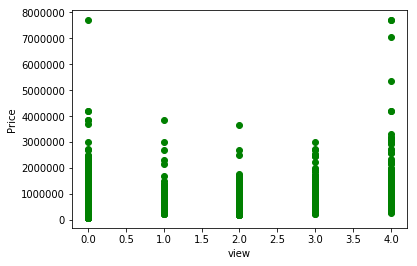

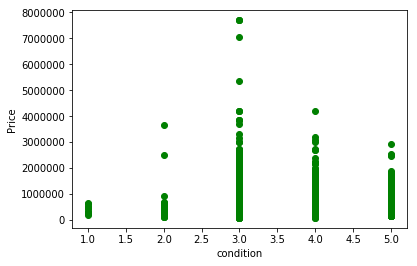

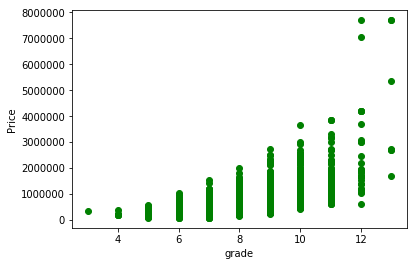

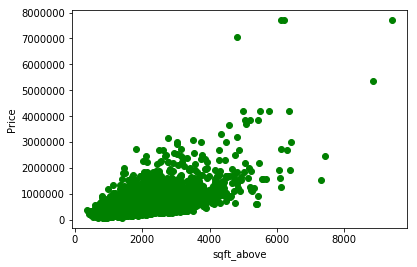

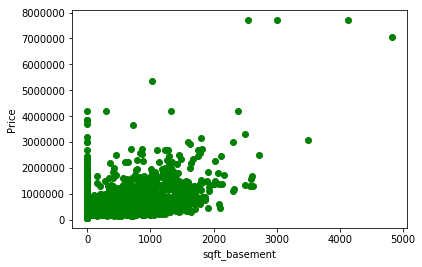

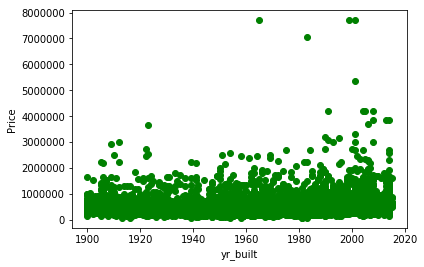

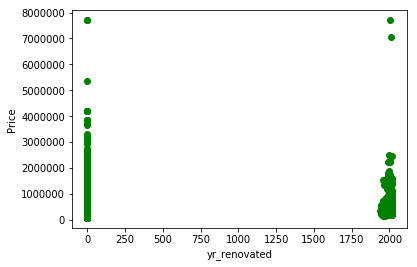

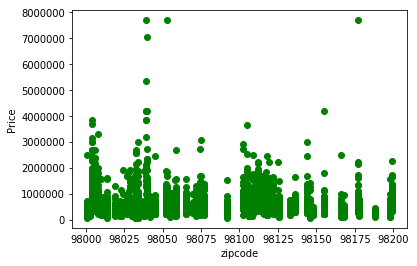

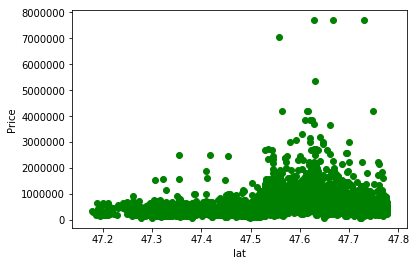

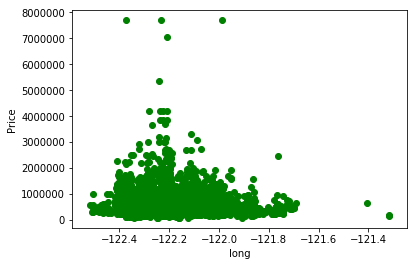

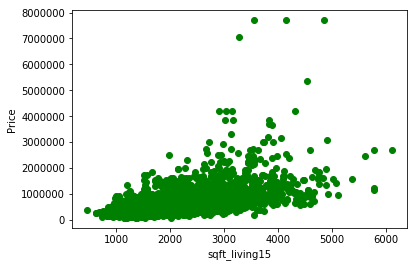

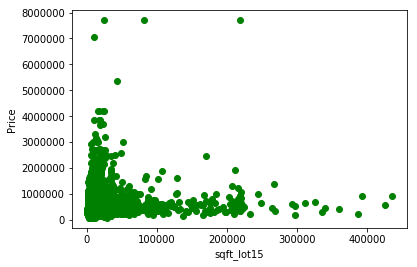

In [46]:
#Visiual represention of every Featue of testing data with Predicted value
for col in X_test.columns:    
    plt.scatter(X_test[col],pred_d_t,color="green")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.show()

# Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
from sklearn.metrics import r2_score, mean_squared_error,confusion_matrix

In [23]:
pred = model.predict(X_test)
pred = pd.Series(pred)

In [24]:
print("r2",r2_score(y_test,pred))
print("mead ",mean_squared_error(y_test,pred))

r2 0.701954714593805
mead  41210722554.289024


In [36]:
print("Actual Value :\n",y_test.head())
print("Predicted Value by Linear Regression :\n",pred.head())

Actual Value :
 17147    805000.0
18386    390000.0
20657    379900.0
21244    485000.0
19922    455000.0
Name: price, dtype: float64
Predicted Value by Linear Regression :
 0    782138.156703
1    178131.239137
2    422479.256172
3    477974.092724
4    380835.000497
dtype: float64


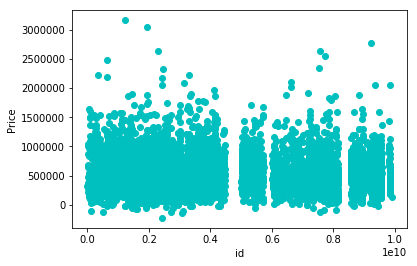

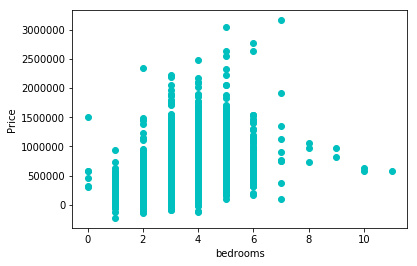

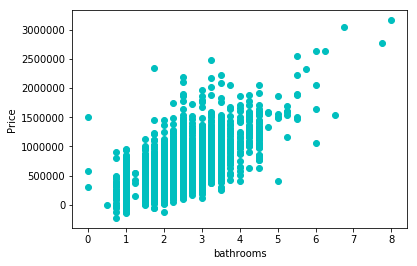

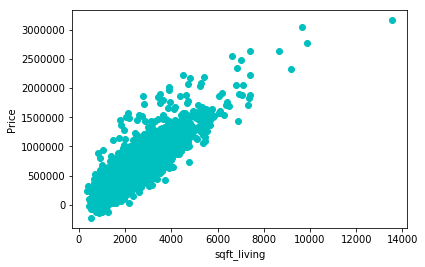

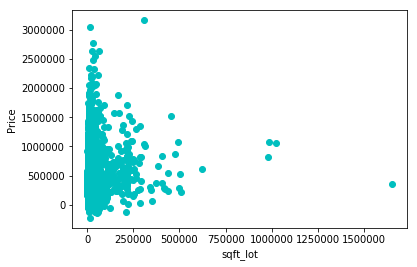

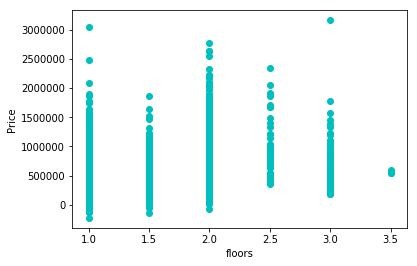

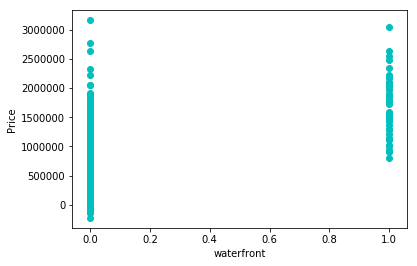

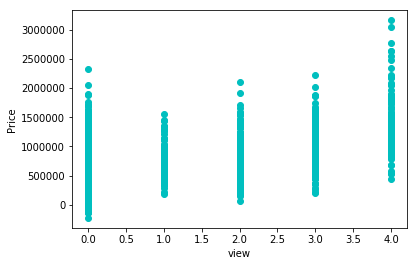

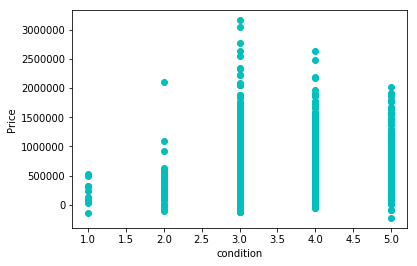

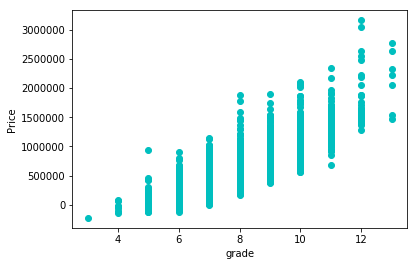

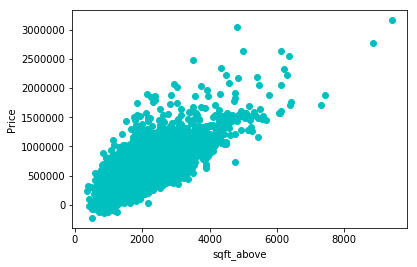

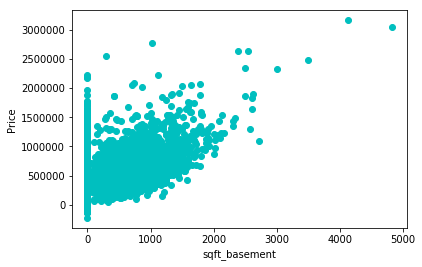

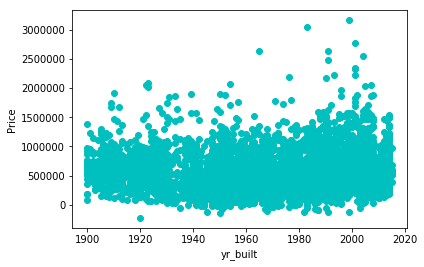

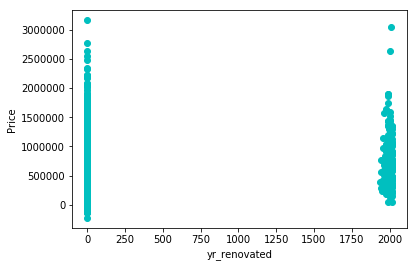

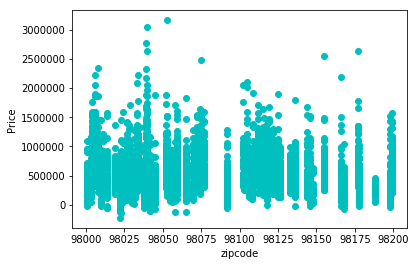

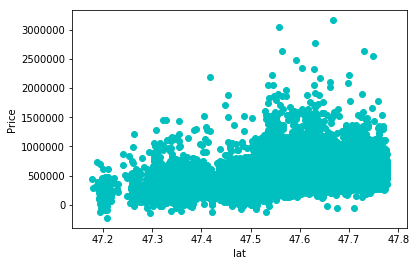

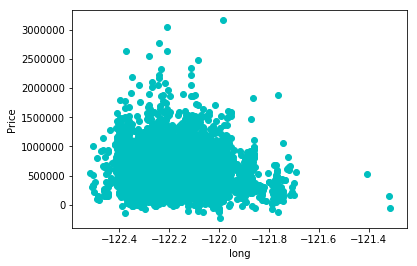

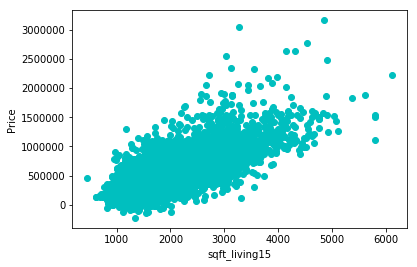

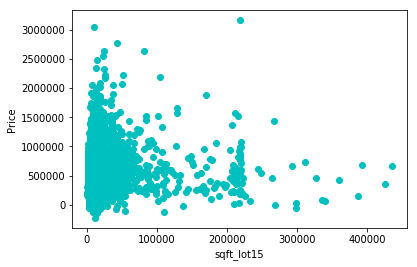

In [49]:
for col in X_test.columns:    
    plt.scatter(X_test[col],pred,color="c")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.show()

In [39]:
import statsmodels.formula.api as sm

In [40]:
X_opt = feature[:]

In [41]:
model_ols = sm.OLS(endog=target,exog=X_opt).fit()

In [42]:
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2961.
Date:                Fri, 05 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:11:44   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
id            -1.252e-06   4.82e-07     -2.597      0.009    -2.2e-06   -3.07e-07
bedrooms       -3.55e+04   1888.470    -18.798      0.000   -3.92e+04   -3.18e+04
bathrooms      4.106e+04   3253.328     12.622      0.000    3.47e+04    4.74e+04
sqft_living     110.2132      2.268     48.589      0.000     105.767     114.659
sqft_lot          0.1270      0.048      2.649      0.008       0.033       0.221
floors         5283.0756   3540.886      1.492      0.136   -1657.322    1.22e+04
waterfront      5.83e+05   1.74e+04     33.585      0.000    5.49e+05    6.17e+05
view           5.249e+04   2128.672     24.660      0.000    4.83e+04    5.67e+04
condition      2.711e+04   2323.813     11.667      0.000    2.26e+04    3.17e+04
grade          9.558e+04   2145.542     44.548      0.000    9.14e+04    9.98e+04
sqft_above       71.3224      2.238     31.872      0.000      66.936      75.709
sqft_basement    38.8908      2.624     14.822      0.000      33.748      44.034
yr_built      -2561.6576     67.997    -37.673      0.000   -2694.937   -2428.378
yr_renovated     20.2785      3.646      5.562      0.000      13.132      27.425
zipcode        -516.6214     17.849    -28.945      0.000    -551.606    -481.637
lat            6.018e+05   1.07e+04     56.071      0.000    5.81e+05    6.23e+05
long          -2.161e+05   1.31e+04    -16.527      0.000   -2.42e+05    -1.9e+05
sqft_living15    23.0964      3.391      6.811      0.000      16.450      29.743
sqft_lot15       -0.3893      0.073     -5.305      0.000      -0.533      -0.245
==============================================================================
Omnibus:                    18425.099   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1886788.781
Skew:                           3.577   Prob(JB):                         0.00
Kurtosis:                      48.211   Cond. No.                     1.94e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.69e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""